In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
import os
import zipfile
# provide here the path to your local directory
local_dir_path = r'D:\vk\Project_visi_komputer' 
local_zip = 'DATASET.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('DATASET_temp')
zip_ref.close()

In [4]:
data_dir = os.path.join(local_dir_path, 'DATASET_temp\DATASET')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

In [5]:
os.getcwd()

'D:\\vk\\Project_visi_komputer'

# DATA GENERATOR

In [6]:
def generator():
    i = 0
    while True:
        i += 1
        yield i

In [7]:
for item in generator():
    print(item)
    if item > 3:
        break

1
2
3
4


In [16]:
# setting some hyperparameters
NR_OF_IMAGES = 294
BATCH_SIZE = 16
STEPS_PER_EPOCH = int(NR_OF_IMAGES/BATCH_SIZE)
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="categorical")

Found 22564 images belonging to 2 classes.


In [20]:
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="categorical")

Found 208 images belonging to 2 classes.


In [21]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="categorical")

Found 2513 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('data example shape:', data_batch[0].shape)
    print('label shape:', labels_batch[0].shape)
    break

data batch shape: (16, 28, 28, 3)
labels batch shape: (16, 2)
data example shape: (28, 28, 3)
label shape: (2,)


The one_hot_encoded label of the plotted image is [1. 0.]


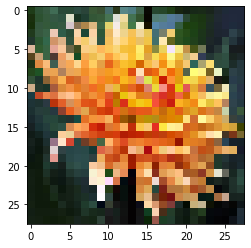

In [24]:
for data_batch, labels_batch in train_generator:
    plt.imshow(data_batch[0])
    print('The one_hot_encoded label of the plotted image is {}'.format(labels_batch[0]))
    break

In [38]:
import tensorflow as tf
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 1000

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [41]:
train_generator = train_datagen.flow_from_directory('DATASET_temp/DATASET/train/',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('DATASET_temp/DATASET/validation/',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('DATASET_temp/DATASET/test/',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 22564 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [42]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [43]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


# Convolutional Neural Network

In [44]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [45]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Compiling Model.......


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 150, 150, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      36896     
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)       

# Prebuild Pemodelan

In [93]:
from tensorflow.keras.applications import MobileNetV2

# get base models
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)

In [94]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

In [95]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [96]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

Trainable params: 3,537,666
Non-trainable params: 34,112
__________________________________________________________________________________________________


In [97]:
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


In [98]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "medium_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)    

Saving Model At model\medium_project\model.h5...


In [ ]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n') 

Accuracy on training data: 0.5269 
Loss on training data: 0.7789 



# SUPLEMENTARY MATERIAL
### Vizualizing intermediary feature maps

In [60]:
# Directory with our training 
class_0_path = os.path.join( train_dir,'O')
class_1_path = os.path.join( train_dir,'R')

In [61]:
class_0_names = os.listdir(class_0_path)
print(class_0_names[:3])
class_1_names = os.listdir(class_1_path)
print(class_1_names[:3])

['O_1.jpg', 'O_10.jpg', 'O_100.jpg']
['R_1.jpg', 'R_10.jpg', 'R_100.jpg']


In [62]:
print('total training  images class 0:', len(os.listdir(class_0_path)))
print('total training  images class 1:', len(os.listdir(class_1_path)))

total training  images class 0: 12565
total training  images class 1: 9999


In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 6
ncols = 4

# Index for iterating over images
pic_index = 0

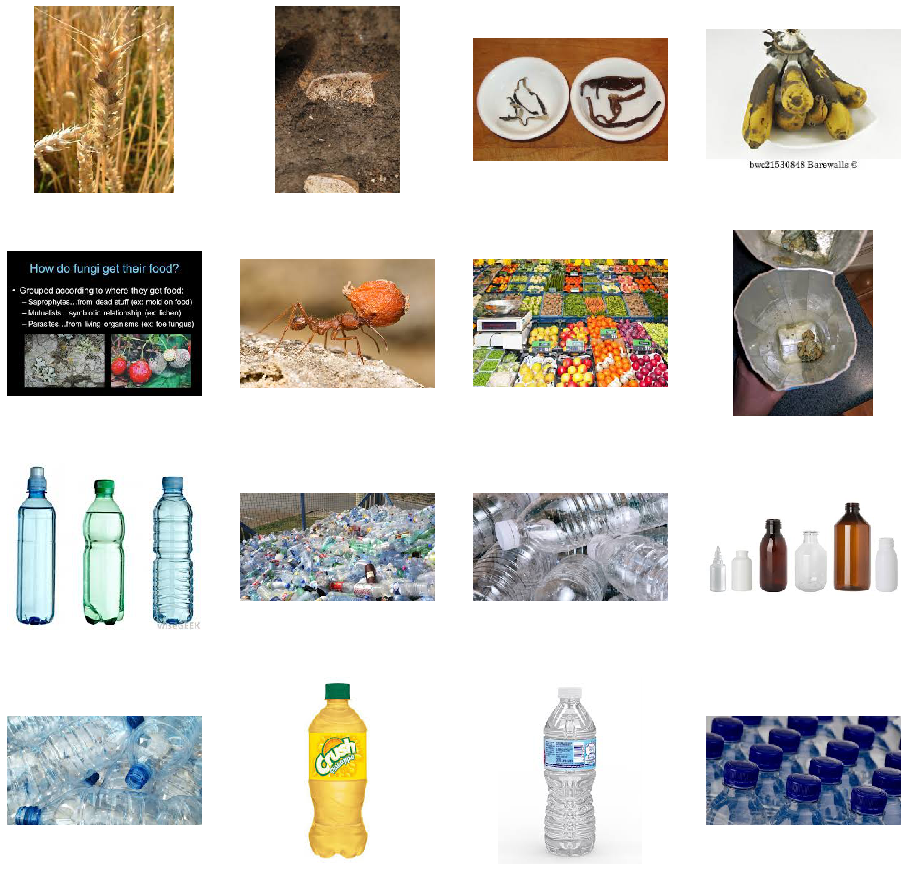

In [65]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_0_pix = [os.path.join(class_0_path, fname) 
                for fname in class_0_names[pic_index-8:pic_index]]
next_1_pix = [os.path.join(class_1_path, fname) 
                for fname in class_1_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_0_pix+next_1_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Pendeteksian Gambar

In [84]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [85]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['O','R']

In [86]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [87]:
from tensorflow.keras.models import load_model

In [89]:
MODEL_PATH = 'model/medium_project/model.h5'
model = load_model(MODEL_PATH,compile=False)


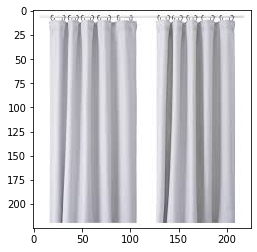

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
img = mpimg.imread('contoh.jpg') 
imgplot = plt.imshow(img) 
plt.show()

In [91]:
im = Image.open('contoh.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

O 0.8779057
